In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('BTC_M2_SP500.csv')
df.head()

,date,btcPrice,m2Supply,sp500
0,5/20/2013,117.818636,5.916670e+13,1666.3
1,5/27/2013,126.392906,5.949020e+13,1666.3
2,6/3/2013,122.949188,6.007240e+13,1640.4
3,6/10/2013,104.357567,6.055980e+13,1642.8
4,6/17/2013,100.126305,5.975500e+13,1639.0


In [85]:
btc = df['btcPrice']
m2 = df['m2Supply']
sp = df['sp500']

In [86]:
df['date'] = pd.to_datetime(df['date']) 
df = df.set_index('date') 
df = df.loc[df.index >= '2022-01-01'].copy()
print(df.head())

               btcPrice      m2Supply    sp500
date                                          
2022-01-03  46453.43235  1.018600e+14  4796.60
2022-01-10  41816.95106  1.022850e+14  4670.30
2022-01-17  42211.27040  1.022570e+14  4577.29
2022-01-24  36659.72522  1.015700e+14  4410.10
2022-01-31  38462.67240  1.031500e+14  4515.60


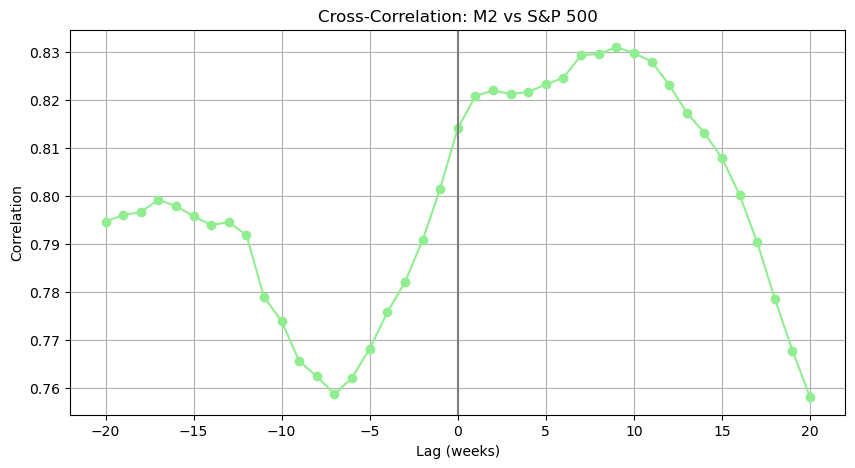

In [108]:
max_lag = 20
lags = range(-max_lag, max_lag + 1)
correlations = []
for lag in lags:
    shifted_sp = sp.shift(-lag) # Positive Lag = M2 Leads SP
    corr = m2.corr(shifted_sp)
    correlations.append(corr)


plt.figure(figsize=(10, 5))
plt.plot(lags, correlations, marker='o', color='lightgreen')
plt.title('Cross-Correlation: M2 vs S&P 500')
plt.xlabel('Lag (weeks)')
plt.ylabel('Correlation')
plt.axvline(x=0, color='gray')
plt.grid(True)
plt.show()


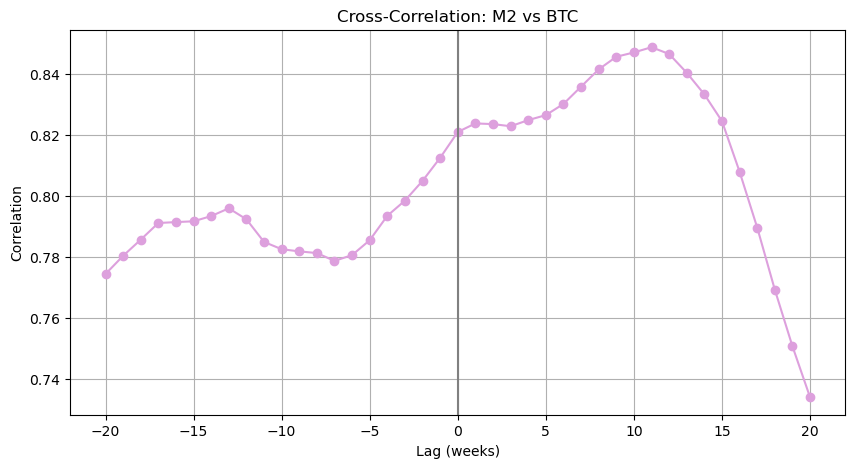

In [110]:
max_lag = 20
lags = range(-max_lag, max_lag + 1)
correlations = []
for lag in lags:
    shifted_btc = btc.shift(-lag) # Positive Lag = M2 Leads BTC
    corr = m2.corr(shifted_btc)
    correlations.append(corr)


plt.figure(figsize=(10, 5))
plt.plot(lags, correlations, marker='o', color='plum')
plt.title('Cross-Correlation: M2 vs BTC')
plt.xlabel('Lag (weeks)')
plt.ylabel('Correlation')
plt.axvline(x=0, color='gray')
plt.grid(True)
plt.show()


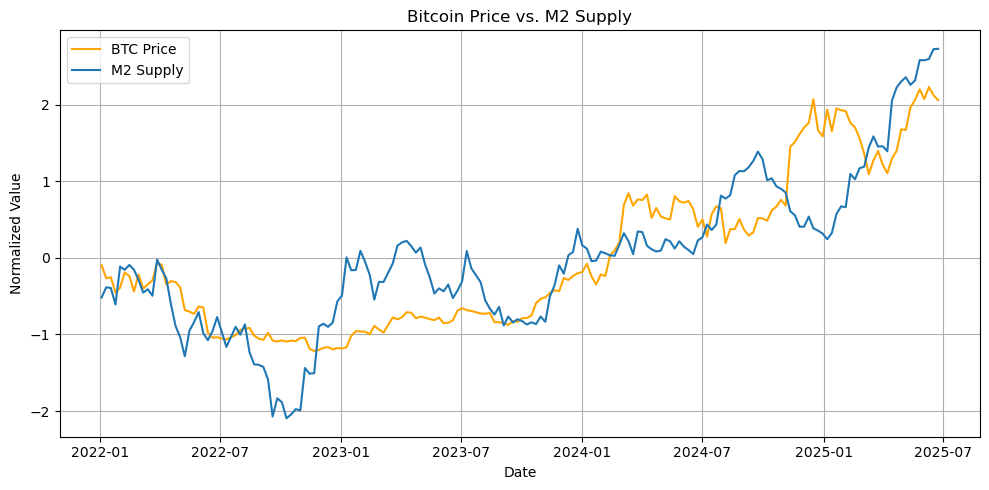

In [96]:
btc = (df['btcPrice'] - df['btcPrice'].mean()) / df['btcPrice'].std()
m2 = (df['m2Supply'] - df['m2Supply'].mean()) / df['m2Supply'].std()

plt.figure(figsize=(10, 5))
plt.plot(btc.index, btc, label='BTC Price', color='orange')
plt.plot(m2.index, m2, label='M2 Supply')
plt.title('Bitcoin Price vs. M2 Supply')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


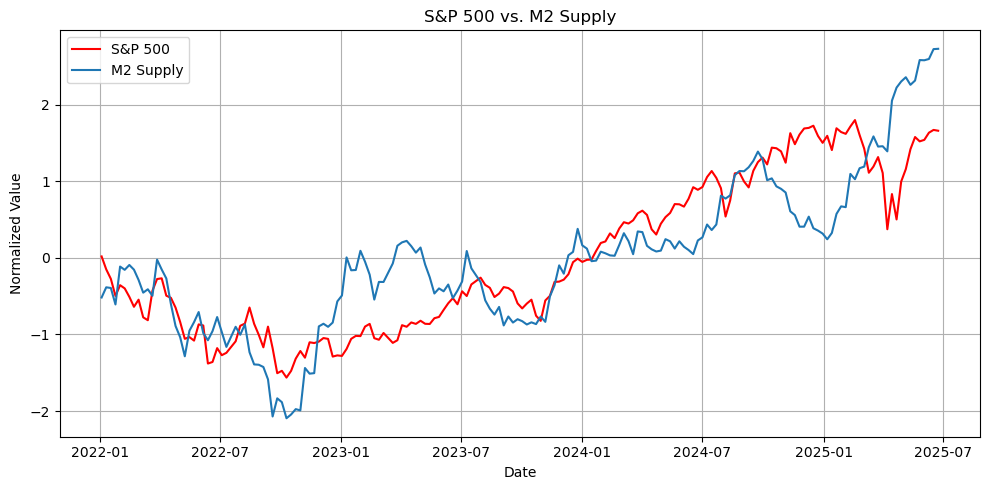

In [99]:
sp = (df['sp500'] - df['sp500'].mean()) / df['sp500'].std()
m2 = (df['m2Supply'] - df['m2Supply'].mean()) / df['m2Supply'].std()

plt.figure(figsize=(10, 5))
plt.plot(sp.index, sp, label='S&P 500', color='red')
plt.plot(m2.index, m2, label='M2 Supply')
plt.title('S&P 500 vs. M2 Supply')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


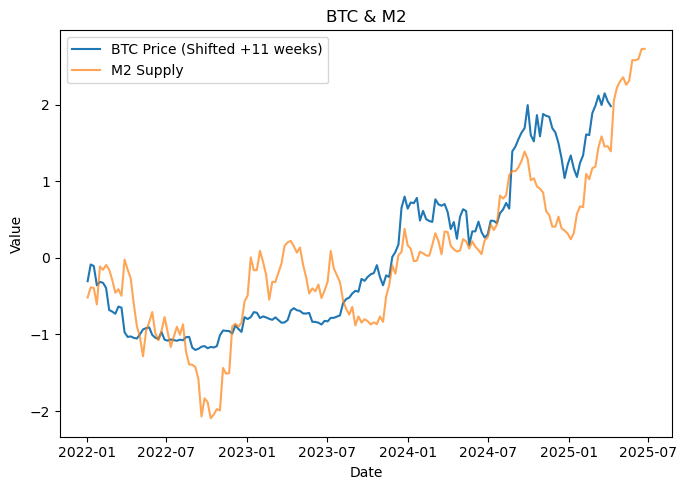

In [138]:
df['btc_shifted_norm'] = (df['btcPrice_shifted']-df['btcPrice_shifted'].mean())/df['btcPrice_shifted'].std()

plt.figure(figsize=(7,5))
plt.plot(df.index, df['btc_shifted_norm'], label='BTC Price (Shifted +11 weeks)')
plt.plot(df.index, df['m2_norm'], label='M2 Supply', alpha=0.7)
plt.title('BTC & M2')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()


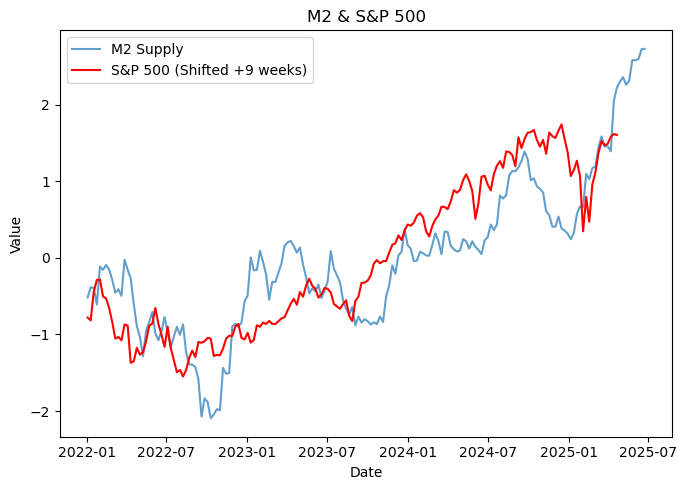

In [155]:
df['sp500_shifted'] = df['sp500'].shift(-9)
df['sp500_shifted_norm'] = (df['sp500_shifted'] - df['sp500_shifted'].mean()) / df['sp500_shifted'].std()
df['m2_norm'] = (df['m2Supply'] - df['m2Supply'].mean()) / df['m2Supply'].std()
df['sp500_norm'] = (df['sp500'] - df['sp500'].mean()) / df['sp500'].std()


plt.figure(figsize=(7,5))

plt.plot(df.index, df['m2_norm'], label='M2 Supply', alpha=0.7)
plt.plot(df.index, df['sp500_shifted_norm'], label='S&P 500 (Shifted +9 weeks)', color='red')

plt.title('M2 & S&P 500')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()
